<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/P7E4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

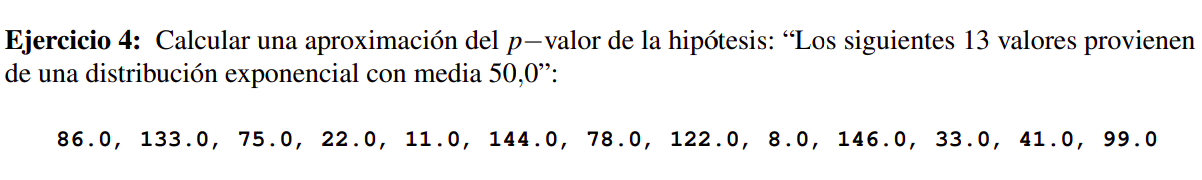

In [19]:
from scipy.stats import chi2
from random import random, seed
import numpy as np

MUESTRA_EMPIRICA = sorted([86.0, 133.0, 75.0, 22.0, 11.0, 144.0, 78.0, 122.0, 8.0, 146.0, 33.0, 41.0, 99.0])
MEDIA_EXPONENCIAL = 50
LAMBDA = 1 / MEDIA_EXPONENCIAL
N_SIM = 100_000

n_TAMANO_MUESTRA = len(MUESTRA_EMPIRICA)

def fda_F(x):
    return 1 - np.exp(-LAMBDA*x)

def muestreador_F():
    return -np.log(1-random())/LAMBDA

def calcular_estadistico_Kolmogorov_Smirnov(muestra, fda):
    muestra_ordenada = sorted(muestra)
    D_max = abs(fda(muestra_ordenada[0]) - (1 / n_TAMANO_MUESTRA))

    for j, y in enumerate(muestra_ordenada, start=1):
        F_y = fda(y)
        D_plus = j / n_TAMANO_MUESTRA - F_y
        D_minus = F_y - (j - 1) / n_TAMANO_MUESTRA
        D_max = max(D_max, D_plus, D_minus)

    return D_max

d_KSconF_empirico = calcular_estadistico_Kolmogorov_Smirnov(MUESTRA_EMPIRICA, fda_F)
print(f"estadistico d usando F: {d_KSconF_empirico}")

estadistico d usando F: 0.3922544552361856


In [20]:
def estimar_Pvalor_KS_conF(n_sim):
    d_empirico = calcular_estadistico_Kolmogorov_Smirnov(MUESTRA_EMPIRICA, fda_F)
    cuenta = 0
    for _ in range(n_sim):
        F_muestra = [muestreador_F() for _ in range(n_TAMANO_MUESTRA)]
        d_simulado = calcular_estadistico_Kolmogorov_Smirnov(F_muestra, fda_F)
        if d_simulado > d_empirico:
            cuenta += 1
    return cuenta / n_sim

seed(1)
p_valor_estimado = estimar_Pvalor_KS_conF(N_SIM)
print(f"P-valor estimado usando F: {p_valor_estimado}")

P-valor estimado usando F: 0.026


In [21]:
def fda_U01(x):
    return x
muestreador_U01 = random

def estimar_Pvalor_KS_conU(n_sim):
    d_empirico = calcular_estadistico_Kolmogorov_Smirnov(MUESTRA_EMPIRICA, fda_F)
    cuenta = 0
    for _ in range(n_sim):
        F_muestra = [muestreador_U01() for _ in range(n_TAMANO_MUESTRA)]
        d_simulado = calcular_estadistico_Kolmogorov_Smirnov(F_muestra, fda_U01)
        if d_simulado > d_empirico:
            cuenta += 1
    return cuenta / n_sim

seed(1)
p_valor_estimado = estimar_Pvalor_KS_conU(N_SIM)
print(f"P-valor estimado usando U: {p_valor_estimado}")

P-valor estimado usando U: 0.026
